In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import datetime as dt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [4]:
df = pd.read_csv("./Currencies Preditive Analysis - All Data.csv")

In [5]:
df.head()

,Date,CPI,Fed Fund Rates,Unemployment rate,GBP/USD
0,1/2/1971,5.0,3.72,5.9,2.42
1,1/3/1971,4.7,3.71,6.0,2.42
2,1/4/1971,4.2,4.16,5.9,2.42
3,1/5/1971,4.4,4.63,5.9,2.42
4,1/6/1971,4.6,4.91,5.9,2.42


In [6]:
x= df[['Fed Fund Rates','Unemployment  rate']]
y = df['GBP/USD']
reg = LinearRegression().fit(x, y)
print(reg.coef_, reg.score(x, y))

[ 0.03510359 -0.00506161] 0.18763067887774865


In [7]:
df.corr().style.background_gradient(cmap='coolwarm') # correlation matrix

/var/folders/yt/r5vqk9zd7f35c460q8mztp2w0000gn/T/ipykernel_7763/4254722649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm') # correlation matrix


,CPI,Fed Fund Rates,Unemployment rate,GBP/USD
CPI,1.000000,0.738008,0.097909,0.623001
Fed Fund Rates,0.738008,1.000000,0.066617,0.432372
Unemployment rate,0.097909,0.066617,1.000000,0.002687
GBP/USD,0.623001,0.432372,0.002687,1.000000


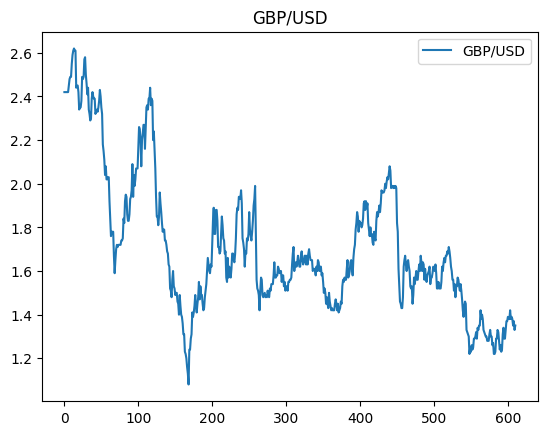

In [8]:
df[['GBP/USD']].plot()
plt.title("GBP/USD")
plt.show()

Text(0.5, 1.0, 'GBP/USD Autocorrelation plot')

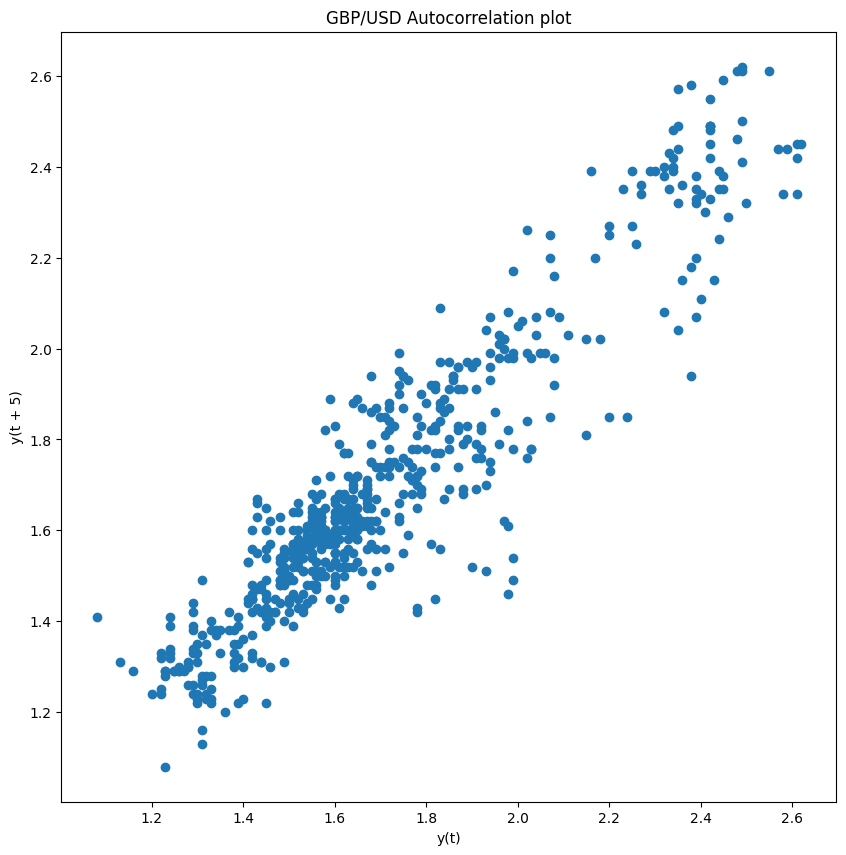

In [9]:
plt.figure(figsize=(10,10))
lag_plot(df['GBP/USD'], lag=5)
plt.title('GBP/USD Autocorrelation plot')

ARIMA (AutoRegressive Integrated Moving Average)

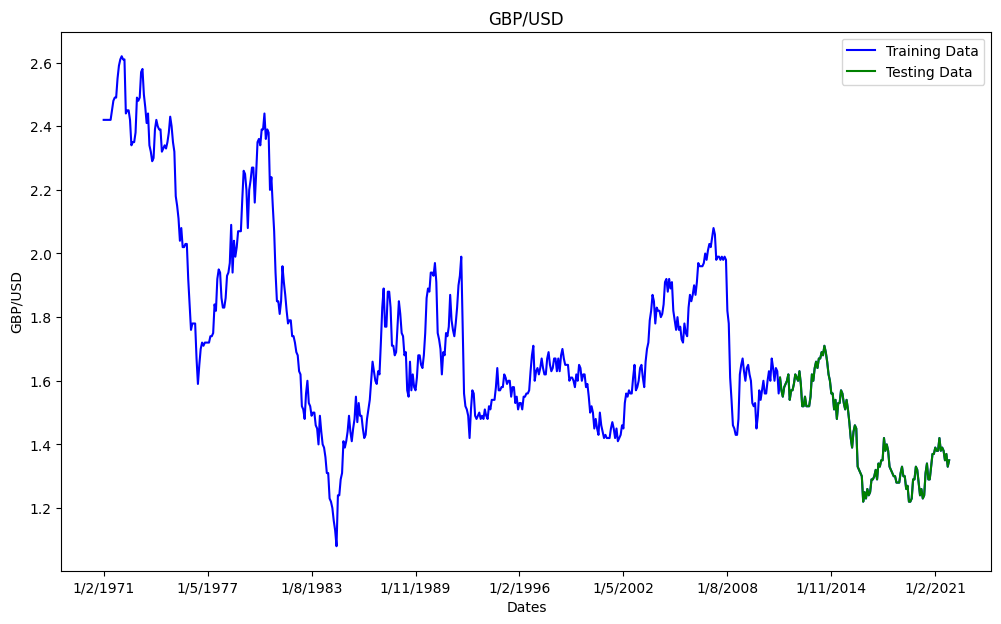

In [10]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('GBP/USD')
plt.xlabel('Dates')
plt.ylabel('GBP/USD')
plt.plot(df['GBP/USD'], 'blue', label='Training Data')
plt.plot(test_data['GBP/USD'], 'green', label='Testing Data')
plt.xticks(np.arange(0,611, 75), df['Date'][0:611:75])
plt.legend()

In [11]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [16]:
import statsmodels.api as sm

In [18]:
train_ar = train_data['GBP/USD'].values
test_ar = test_data['GBP/USD'].values

# time-series-forecasting-with-python
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    # print(model_fit.summary())
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/Users/tomideisawesome/Documents/GitHub/TomsWebScrapingCargo/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tomideisawesome/Documents/GitHub/TomsWebScrapingCargo/venv/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Testing Mean Squared Error: 0.001
Symmetric mean absolute percentage error: 1.904


/var/folders/yt/r5vqk9zd7f35c460q8mztp2w0000gn/T/ipykernel_7763/1584773428.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['GBP/USD'], 'green', color='blue', label='Training Data')


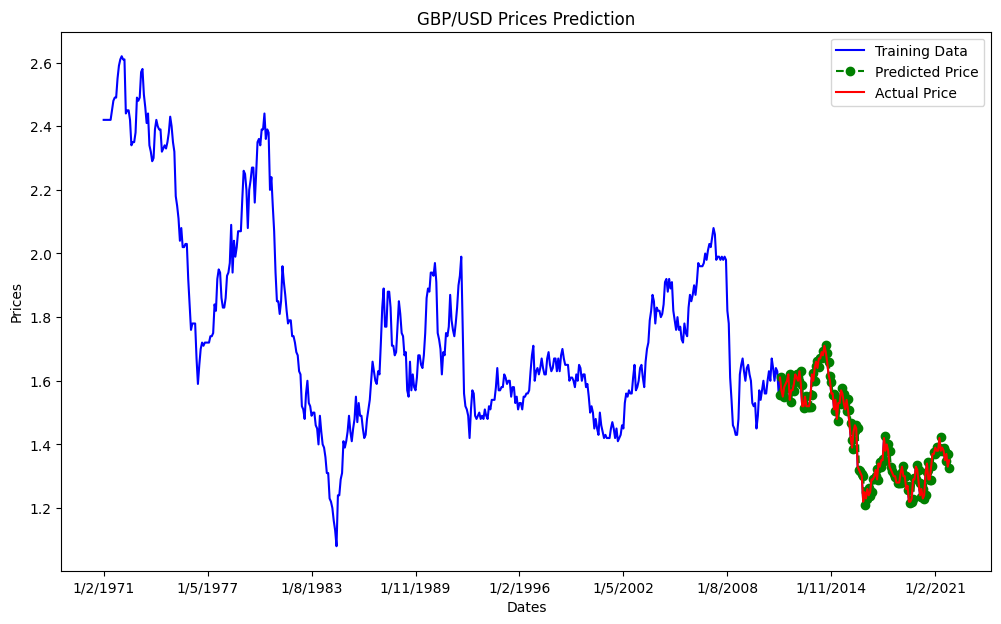

In [19]:
plt.figure(figsize=(12,7))
plt.plot(df['GBP/USD'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['GBP/USD'], color='red', label='Actual Price')
plt.title('GBP/USD Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,611, 75), df['Date'][0:611:75])
plt.legend()

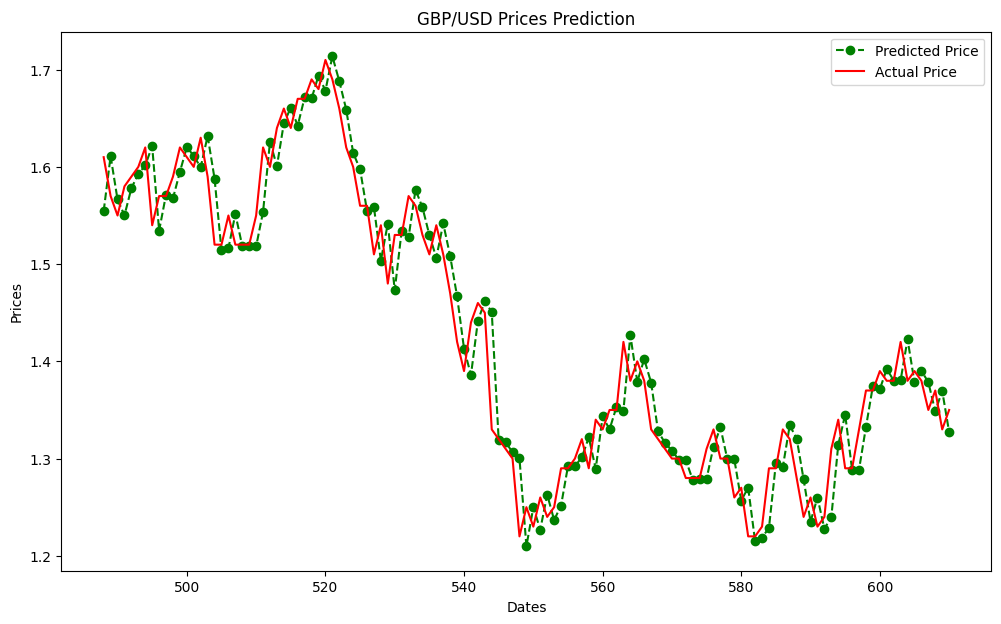

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['GBP/USD'], color='red', label='Actual Price')
plt.title('GBP/USD Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(502,611,75), df['Date'][502,611,75])
plt.legend()

GBP/USD DAILY DATA SET

In [64]:
usdgbp_df = pd.read_csv("./FX_IDC_GBPUSD, 1D.csv", parse_dates=['time']).drop(columns =['Shapes', 'Shapes.1'])
usdgbp_df.head()
ts = usdgbp_df

In [65]:



ts = usdgbp_df
ts['time'] = pd.to_datetime(ts['time'], utc=True).dt.date
ts.drop(['open', 'high', 'low'], axis=1, inplace=True)
ts = ts.set_index('time')

ts.head()

,time,close
0,1971-01-03,2.3938
1,1971-01-04,2.3949
2,1971-01-05,2.3967
3,1971-01-06,2.3963
4,1971-01-07,2.3972


In [22]:
usdgbp_df['time'].dtypes
usdgbp_df['time'] = pd.to_datetime(usdgbp_df['time'], utc=True).dt.date #conversion to date !== string
# df['time'] = df.index #index === time

In [23]:
# usdgbp_df['time'] = usdgbp_df.index #index === time
usdgbp_df["time"] = usdgbp_df["time"].astype(str)

# usdgbp_df = usdgbp_df.set_index('time')
usdgbp_df

,time,open,high,low,close
0,1971-01-03,2.3938,2.3938,2.3938,2.3938
1,1971-01-04,2.3949,2.3949,2.3949,2.3949
2,1971-01-05,2.3967,2.3967,2.3967,2.3967
3,1971-01-06,2.3963,2.3963,2.3963,2.3963
4,1971-01-07,2.3972,2.3972,2.3972,2.3972
...,...,...,...,...,...
13347,2022-11-24,1.2109,1.2128,1.2058,1.2093
13348,2022-11-27,1.2093,1.2118,1.1941,1.1956
13349,2022-11-28,1.1956,1.2064,1.1945,1.1950
13350,2022-11-29,1.1951,1.2087,1.1901,1.2054


In [28]:


# datetime = parse(usdgbp_df['time'])

usdgbp_df['time'] = pd.to_datetime(usdgbp_df['time'], utc=True).dt.date #conversion to date !== string

In [30]:
usdgbp_df.index = usdgbp_df['time']  #index === time
usdgbp_df

,time,open,high,low,close
time,,,,,
1971-01-03,1971-01-03,2.3938,2.3938,2.3938,2.3938
1971-01-04,1971-01-04,2.3949,2.3949,2.3949,2.3949
1971-01-05,1971-01-05,2.3967,2.3967,2.3967,2.3967
1971-01-06,1971-01-06,2.3963,2.3963,2.3963,2.3963
1971-01-07,1971-01-07,2.3972,2.3972,2.3972,2.3972
...,...,...,...,...,...
2022-11-24,2022-11-24,1.2109,1.2128,1.2058,1.2093
2022-11-27,2022-11-27,1.2093,1.2118,1.1941,1.1956
2022-11-28,2022-11-28,1.1956,1.2064,1.1945,1.1950


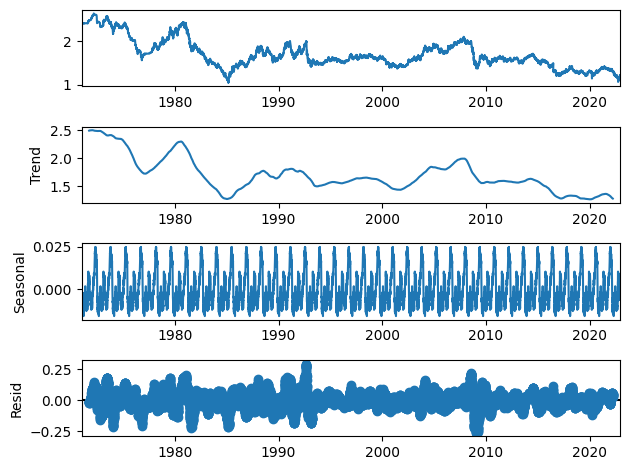

In [68]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period = 365)
fig = decomposition.plot()
plt.show()

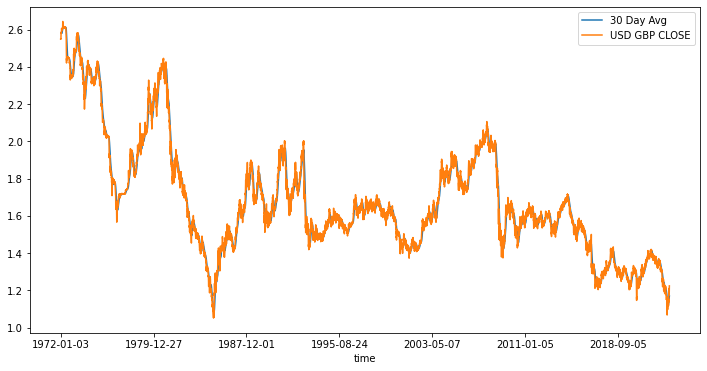

In [ ]:
# moving averages
plt.figure(figsize=(12, 6))
usdgbp_df['close']['1972-01-03':'2022-11-30'].rolling(window=30).mean().plot(label='30 Day Avg')
usdgbp_df['close']['1972-01-03':'2022-11-30'].plot(label='USD GBP CLOSE')
plt.legend()

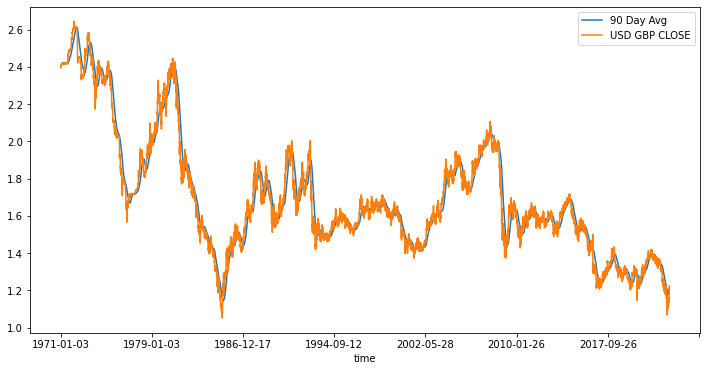

In [ ]:
plt.figure(figsize=(12, 6))
usdgbp_df['close']['1971-01-03':'2022-11-30'].rolling(window=90).mean().plot(label='90 Day Avg')
usdgbp_df['close']['1971-01-03':'2022-11-30'].plot(label='USD GBP CLOSE')
plt.legend()

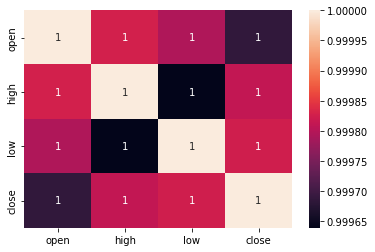

In [ ]:
sns.heatmap(usdgbp_df.corr(),annot=True)
#Lmao

In [ ]:
train_data, test_data = usdgbp_df[0:int(len(usdgbp_df)*0.8)], usdgbp_df[int(len(usdgbp_df)*0.8):]
train_data.head()

,time,open,high,low,close
time,,,,,
1971-01-03,1971-01-03,2.3938,2.3938,2.3938,2.3938
1971-01-04,1971-01-04,2.3949,2.3949,2.3949,2.3949
1971-01-05,1971-01-05,2.3967,2.3967,2.3967,2.3967
1971-01-06,1971-01-06,2.3963,2.3963,2.3963,2.3963
1971-01-07,1971-01-07,2.3972,2.3972,2.3972,2.3972


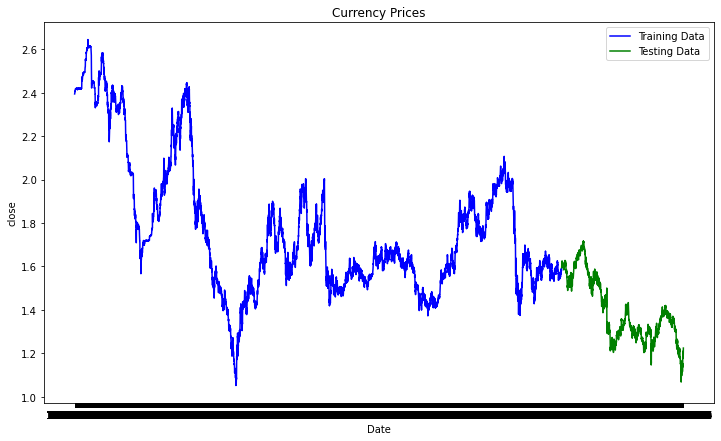

In [ ]:
train_data, test_data = usdgbp_df[0:int(len(usdgbp_df)*0.8)], usdgbp_df[int(len(usdgbp_df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Currency Prices')
plt.xlabel('Date')
plt.ylabel('close')
plt.plot(train_data['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300))
  #bank_stocks['Date'][0:7982:1300])
plt.legend()